# Probability Distribution
># 1. Generating Random Numbers

### random seed

In [1]:
import numpy as np

np.random.seed(0) #0이상의 정수를 넣으면 seed를 생성

### random numbers

In [ ]:
np.random.rand(5) #seed를 이용해 5번의 난수 생성 #seed가 같은 경우 동일한 난수 생성 #seed를 안주면 자체적으로 seed를 설정
np.random.rand(3,5) #0부터 1사이의 균일한 확률 분포로, 주어진 크기의 난수 행렬 생성
np.random.randn(3,5) #기댓값이 0이고 표준편차가 1인 가우시안 표준 정규 분포 난수 생성
np.random.randint(low, high=None, size=None) #high를 입력하지 않으면 0~low, 입력하면 low~high 사이의 숫자를 size만큼 출력

### shuffle (inplace)

In [9]:
x = [1,2,3,4,5]
np.random.shuffle(x) #x라는 리스트를 shuffle함 #inplace(원본을 바꿈)
x

[5, 3, 2, 4, 1]

### sampling
`np.random.choice(a, size=None, replace=True, p=None)`
* a: 배열이면 원래의 데이터, 정수이면 range(a) 명령으로 데이터 생성
* size: 샘플 숫자(정수)
* replace: 불리언. True이면 한번 선택한 데이터를 다시 선택 가능
* p: 배열. 각 데이터가 선택될 수 있는 확률

In [17]:
np.random.choice(5, 5, replace=False) #shuffle과 동일
np.random.choice(5, 10, p=[0.1, 0, 0.3, 0.6, 0]) #선택할 확률을 다르게 설정

array([3, 3, 2, 3, 2, 3, 2, 3, 2, 3])

### counting

In [ ]:
np.unique([11, 11, 2, 2, 34, 34]) #중복되지 않는 값의 리스트 출력
index, count = np.unique(a, return_counts=True) #각 값을 가진 데이터 개수도 출력

#unique 함수 사용 시 없는 수에 대해서는 count하지 않는다
#이 경우 bincount 사용 / 0부터 minlength-1까지의 숫자에 대해 카운트한다
np.bincount([1, 1, 2, 2, 2, 3], minlength=6)

># 2. Generating Probability Distribution with Python

### Keyword

| type | keyword | name of distribution |
|-|-|-|
| discrete | `bernoulli` | Bernoulli d. |
| discrete | `binom` |  Binomial d. |
| continuous | `uniform` | Uniform d. |
| continuous | `norm` | Gaussian Normal d. |
| continuous | `t` | Student t d. |
| continuous | `chi2` | Chi Squared d. |
| continuous | `f` | F d. |
| continuous | `beta` | Beta d. |
| continuous | `gamma` | Gamma d. |
| continuous | `dirichlet` | Dirichlet d. |
| continuous | `multivariate_normal` | MVN(Multivariate Normal) d. |

### Parameters
* 분포 별로 모수의 이름은 다르지만 다음의 4가지는 통상적으로 동일하다

| parameters | meaning |
|-|-|
| `loc` | expectation |
| `scale` | standard deviation | 
| `size` | sample size | 
| `random_state` |  random seed |

### Probability Method

| method | function |
|-|-|
| `pdf` | 확률 밀도 함수  (probability density function) |
| `pmf` | 확률 질량 함수  (probability mass function) |
| `cdf` | 누적 분포 함수 (cumulative distribution function)  |
| `rvs` | 랜덤 샘플 생성 (random variable sampling)    |
| `stats` | 기술 통계 함수 (descriptive statistics)   |
| `fit` | 모수 추정 (parameter estimation)    |

### example

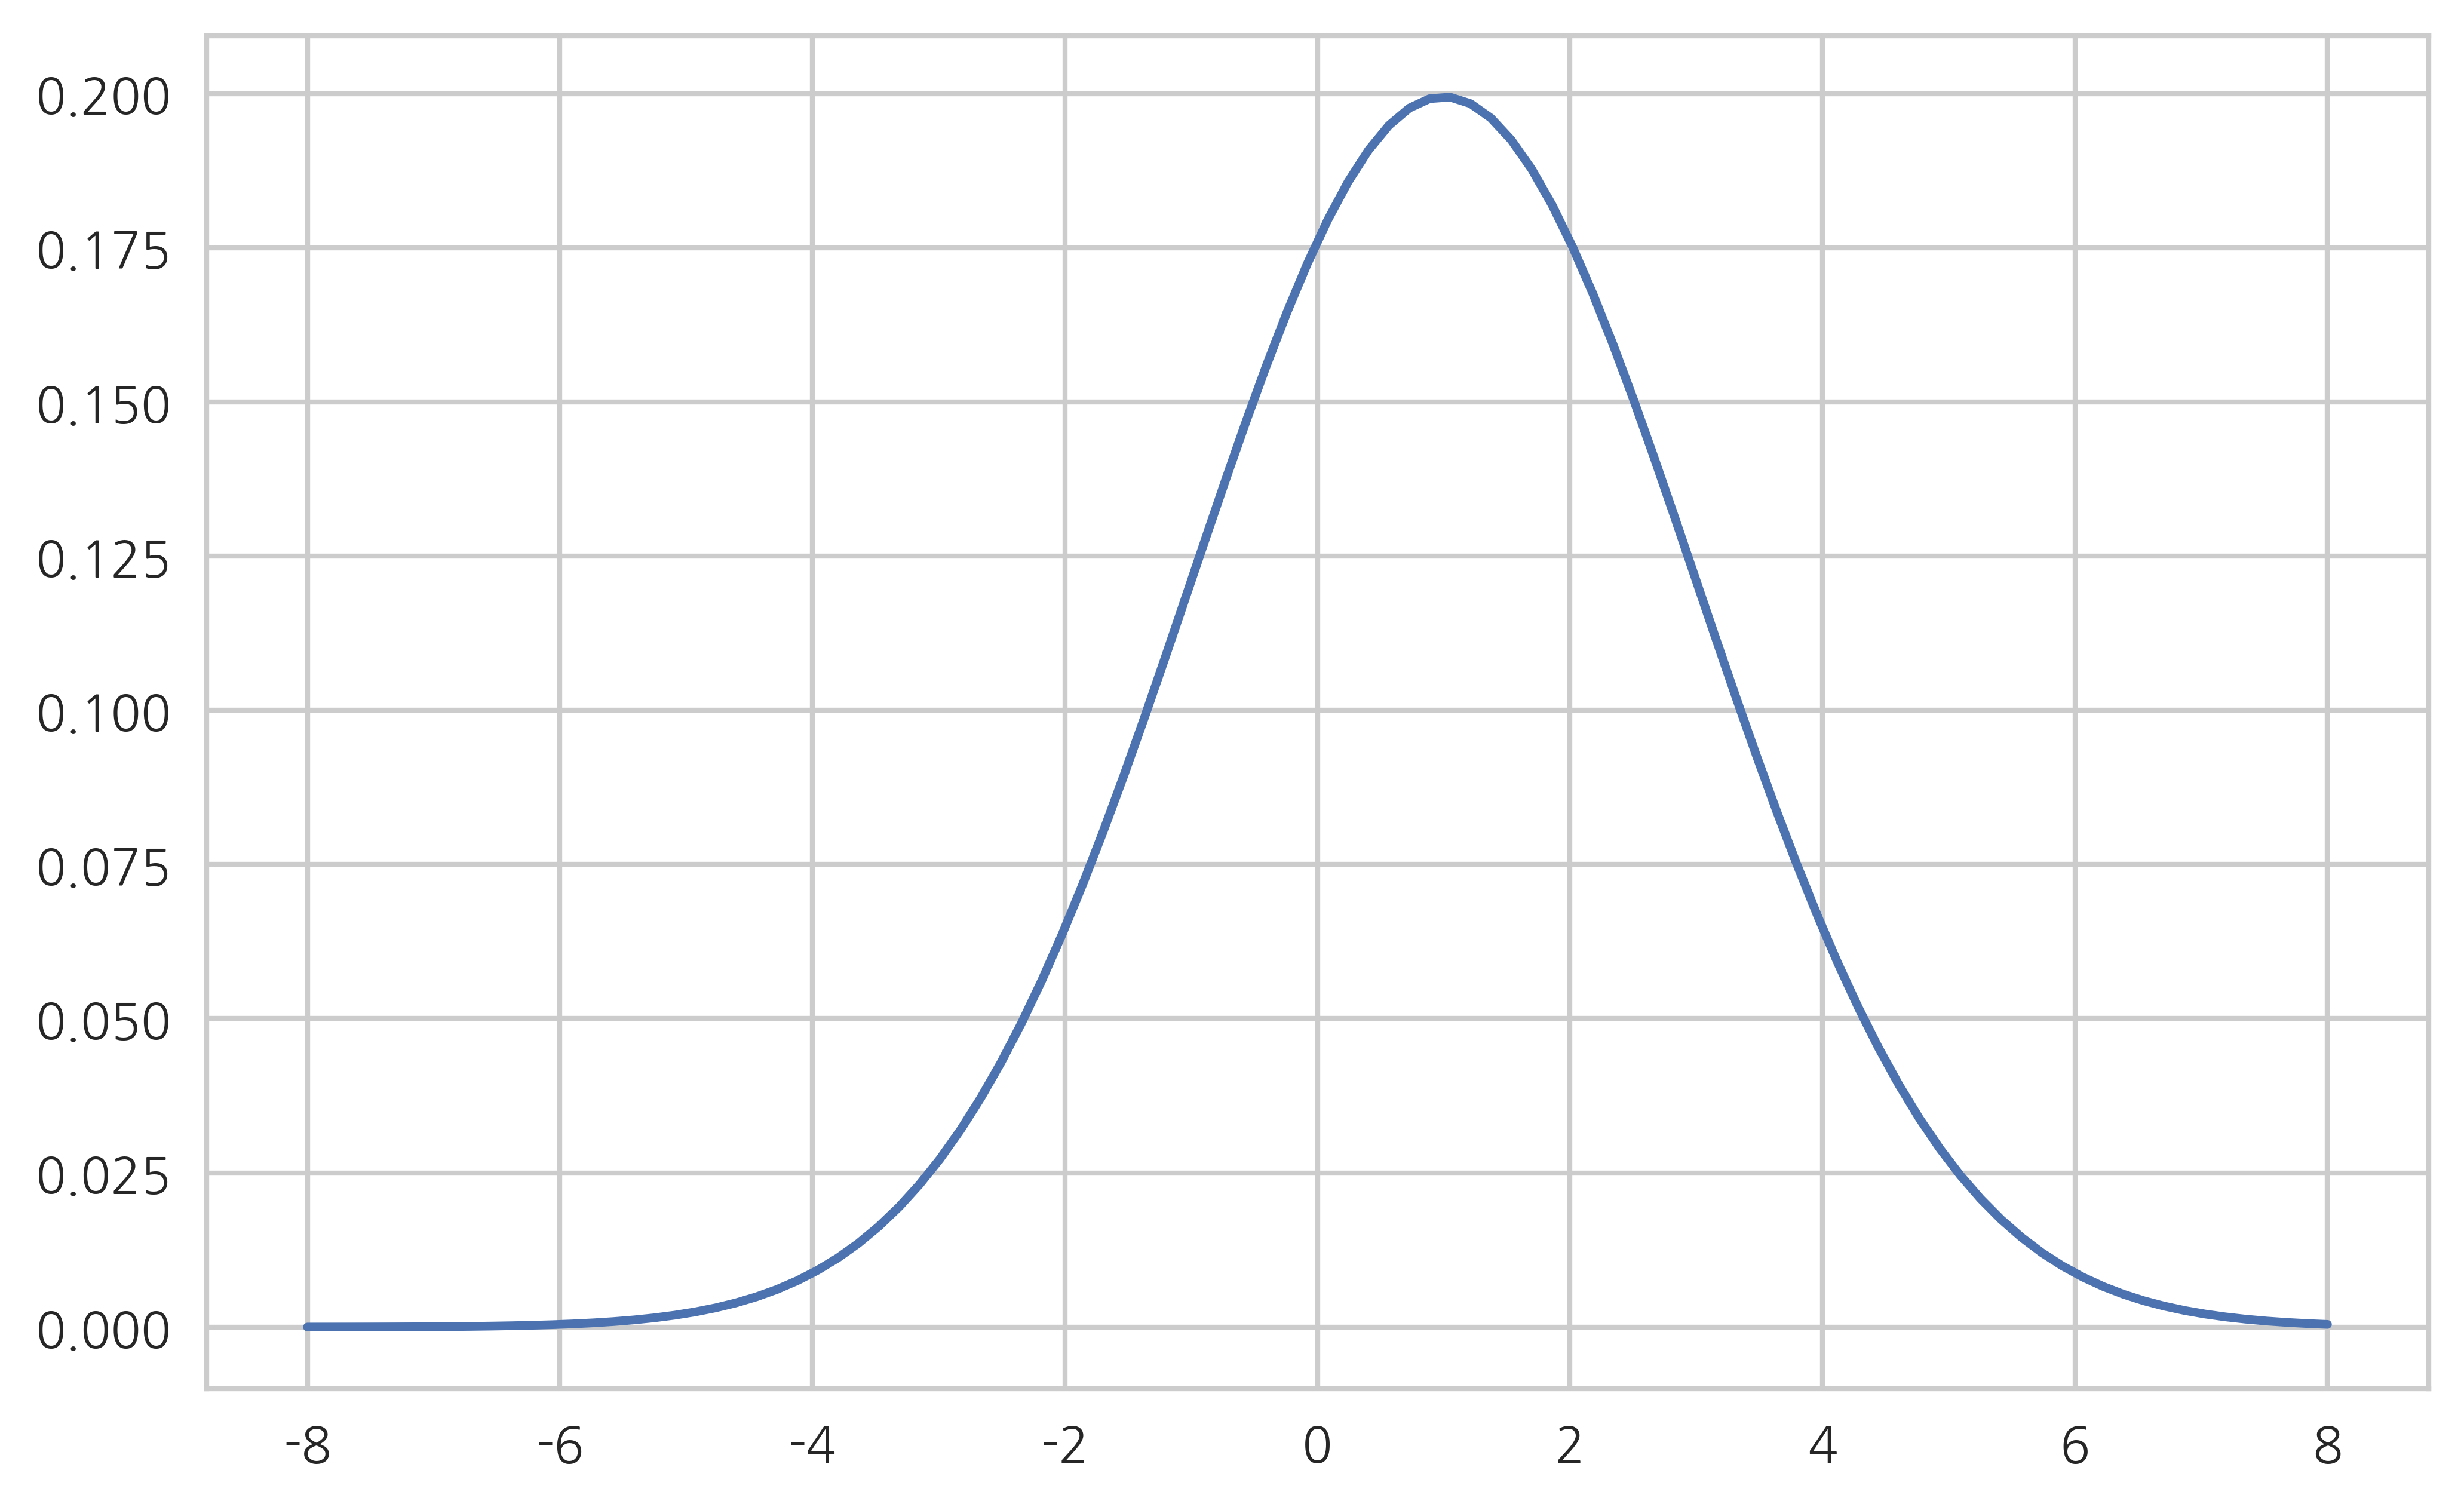

In [65]:
import scipy as sp
rv = sp.stats.norm(loc=1, scale=2) # 평균 1, 표준편차 2인 정규분포 생성

rv.rvs(size=(20,10), random_state=0) # 20X10 만큼의 랜덤 샘플 생성

xx = np.linspace(-8, 8, 100) 

pdf = rv.pdf(xx)
plt.plot(xx, pdf)
plt.show()

># 3. Representative values of Probability Distribution

### 샘플 평균(sample mean, sample average)

* 유한한 갯수($N$개)의 자료 값의 집합의 평균
$$$$
$$ m = \dfrac{1}{N}\sum_{i=1}^{N} x_i $$
$$$$
* 확률 변수 $X$의 샘플의 평균
$$$$
$$ \bar{X} = \dfrac{1}{N}\sum_{i=1}^{N} X_i $$
$$$$

### 기댓값(expectation)
* 확률 모형에 따른 이론적 평균을 의미, 확률 모형이 존재함이 확실한 경우 단순히 평균(mean)이라고 말하기도 함
* 연속 확률 변수의 경우,
$$$$
$$ \mu = \operatorname{E}[X] = \int_{-\infty}^{\infty} x f(x) dx $$
$$$$
* 이산 확률 변수의 경우,
$$$$
$$ \mu = \operatorname{E}[X] = \sum xP(x) $$
$$$$

### 기댓값의 성질
$$$$
$$ \operatorname{E}[cX] = c \operatorname{E}[X] \\ $$
$$ \operatorname{E}[X + Y] = \operatorname{E}[X] + \operatorname{E}[Y] $$
$$$$
* 두 확률변수 $X$와 $Y$가 독립이면,
$$$$
$$ \text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] = 0 $$
$$$$
* 샘플 평균의 기댓값은 원래의 확률 변수의 기댓값과 일치한다
$$$$
$$ \operatorname{E}[ \bar{X} ] = \operatorname{E}[X] $$

### 중앙값(median)
* 전체 자료를 크기별로 정렬했을 때 가장 중앙에 위치하게 되는 값
* 연속 확률 변수:
  * pdf의 넓이를 2등분하는 지점
  * cdf의 높이가 0.5가 되는 지점
* 이산 확률 변수:
  * 샘플개수 $N$이 홀수이면: 중간값은 $(n + 1)/2$번째 샘플의 값
  * 샘플개수 $N$이 짝수이면: 중간값은 $n/2$번째 샘플의 값과 $n/2 + 1$번째 샘플의 값의 평균

### 최빈값(mode)
* 연속 확률 변수:
  * 확률 밀도 함수의 값이 가장 커지는 확률 변수의 값
  * $ \text{mode} = \arg \max_x f(x) $
* 이산 확률 변수:
  * 가장 빈번하게 나오는 값

### 분산(variance)

* **Biased Sample Variance**
$$s^2_{\text{biased}} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2$$
* **Unbiased Sample Variance**
$$s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2$$
* 연속 확률 변수
$$\sigma^2 = \text{Var}[X] = \text{E}[(X - \mu)^2] = \int_{-\infty}^{\infty} (x - \mu)^2 f(x)dx$$
* 이산 확률 변수
$$\sigma^2 = \sum (x - \mu)^2 P(x)$$

### 분산의 성질
$$$$
$$ \text{Var}[X] \geq 0 $$
$$$$
$$ \text{Var}[cX] = c^2 \text{Var}[X] $$
$$$$
$$ \text{Var}[X] = \text{E}[X^2] - (\text{E}[X])^2  = \text{E}[X^2] - \mu^2$$
$$$$
$$ 
\begin{eqnarray}
\text{Var}[X] 
&=& \text{E}[(X - \mu)^2] \\
&=& \text{E}[X^2 - 2\mu X + \mu^2] \\
&=& \text{E}[X^2] - 2\mu\text{E}[X] + \mu^2 \\
&=& \text{E}[X^2] - 2\mu^2 + \mu^2 \\
&=& \text{E}[X^2] - \mu^2\\
\end{eqnarray}
$$

### 독립인 두 확률 변수의 분산
* 증명은 부록-1. 참조
$$$$
$$ \text{Var}\left[ X + Y \right] =  \text{Var}\left[ X \right] + \text{Var}\left[ Y \right]$$
$$$$

### 샘플 평균의 분산
* 증명은 부록-2. 참조
$$ 
\text{Var}[\bar{X}] = \dfrac{1}{N} \text{Var}[X] = \dfrac{\sigma^2}{N}
$$ 

### 기대값의 추정치
* 위의 공식과 $ \text{E}[\bar{X}] = \text{E}[{X}]$를 결합하면,
* $N$이 높은 샘플 모델을 여러 개 구하고 그 샘플 모델들의 기대값을 구하면 기존 모델의 기대값과 가까워진다

### 샘플 분산의 기대값
* 증명은 부록-3. 참조
$$$$
$$
\text{E}[s^2] = \sigma^2 - \dfrac{2\sigma^2}{N} + \dfrac{\sigma^2}{N} = \dfrac{N-1}{N}\sigma^2 
$$
$$$$
* 따라서 샘플 분산의 기대값이 정확하게 $\sigma^2$이 되려면 분모가 $N$이 아니라 $N-1$이 되어야 한다.
$$$$
$$
\sigma^2 
= \dfrac{N}{N-1} \text{E}[s^2] 
= \dfrac{N}{N-1} \text{E} \left[ \dfrac{1}{N} \sum (X_i-\bar{X})^2 \right] 
= \text{E} \left[ \dfrac{1}{N-1} \sum (X_i-\bar{X})^2 \right] 
= \text{E} \left[ s^2_{\text{unbiased}} \right] 
$$

### Moment
* 1차 모멘트 = $\text{E}[X]$ : 기댓값 (Expectation)
* 2차 모멘트 = $\text{E}[(X-\mu)^2]$ : 분산 (Variance)
* 3차 모멘트 = $\text{E}[(X-\mu)^3]$ : 스큐니스 (Skewness) ($<0$ : biased to left / $=0$ : symmetric / $>0$ : biased to right)
* 4차 모멘트 = $\text{E}[(X-\mu)^4]$ : 커토시스 (Kurtosis)
* *모든 차수의 모멘트 값이 같으면 같은 확률 분포이다.*
* *Uni-modal distribution인 경우 4차 모멘트까지 같으면 실용적으로 같은 분포라고 볼 수 있다.*

### Representative values - numpy

In [7]:
a = [1,1,2,3,4]
print(np.mean(a))
print(np.nanmean(a))
print(np.median(a))
print(np.argmax(a))
print(np.histogram(a))
print(np.var(a))
print(np.std(a))
print(np.nanvar(a))
print(np.nanstd(a))

2.2
2.2
2.0
4
(array([2, 0, 0, 1, 0, 0, 1, 0, 0, 1]), array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]))
1.36
1.16619037897
1.36
1.16619037897


># 4. Probability Distribution - scipy / matplotlib / seaborn

### Creating Probability Distribution

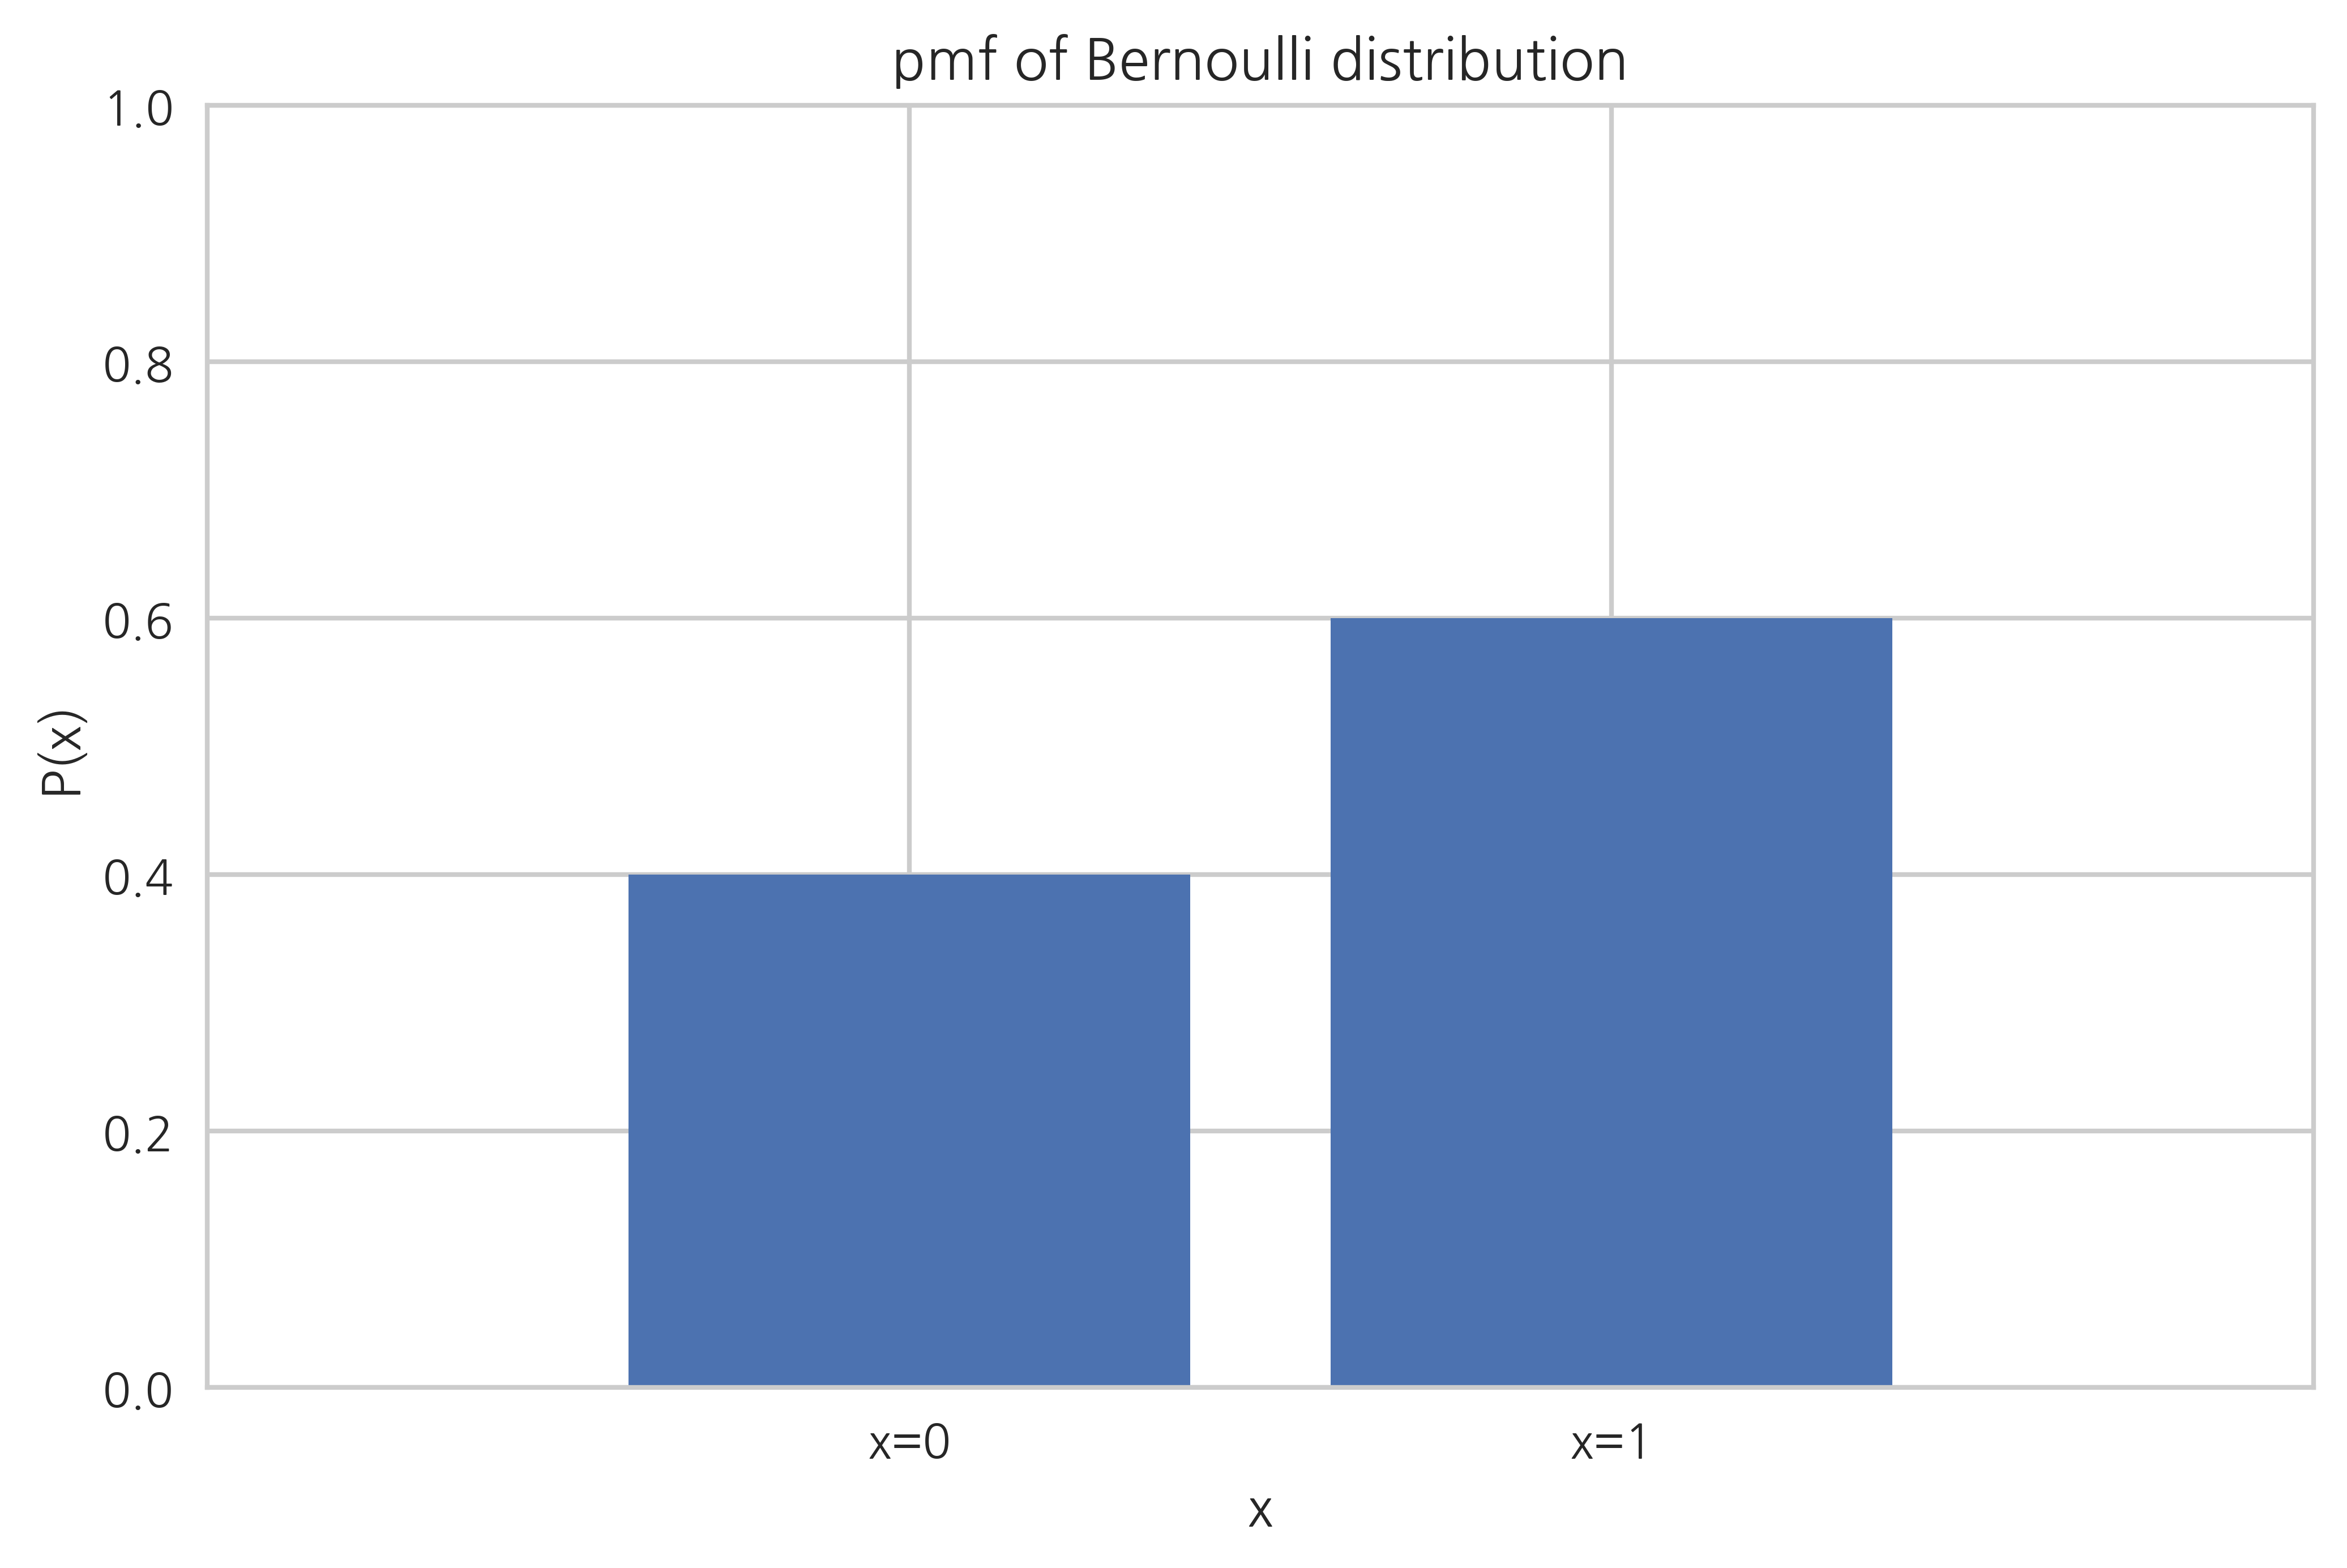

In [15]:
theta = 0.6
rv = sp.stats.bernoulli(theta)

xx = [0, 1]
plt.bar(xx, rv.pmf(xx))

plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ["x=0", "x=1"])

plt.xlabel("x")
plt.ylabel("P(x)")
plt.title("pmf of Bernoulli distribution")

plt.show()

### Simulation

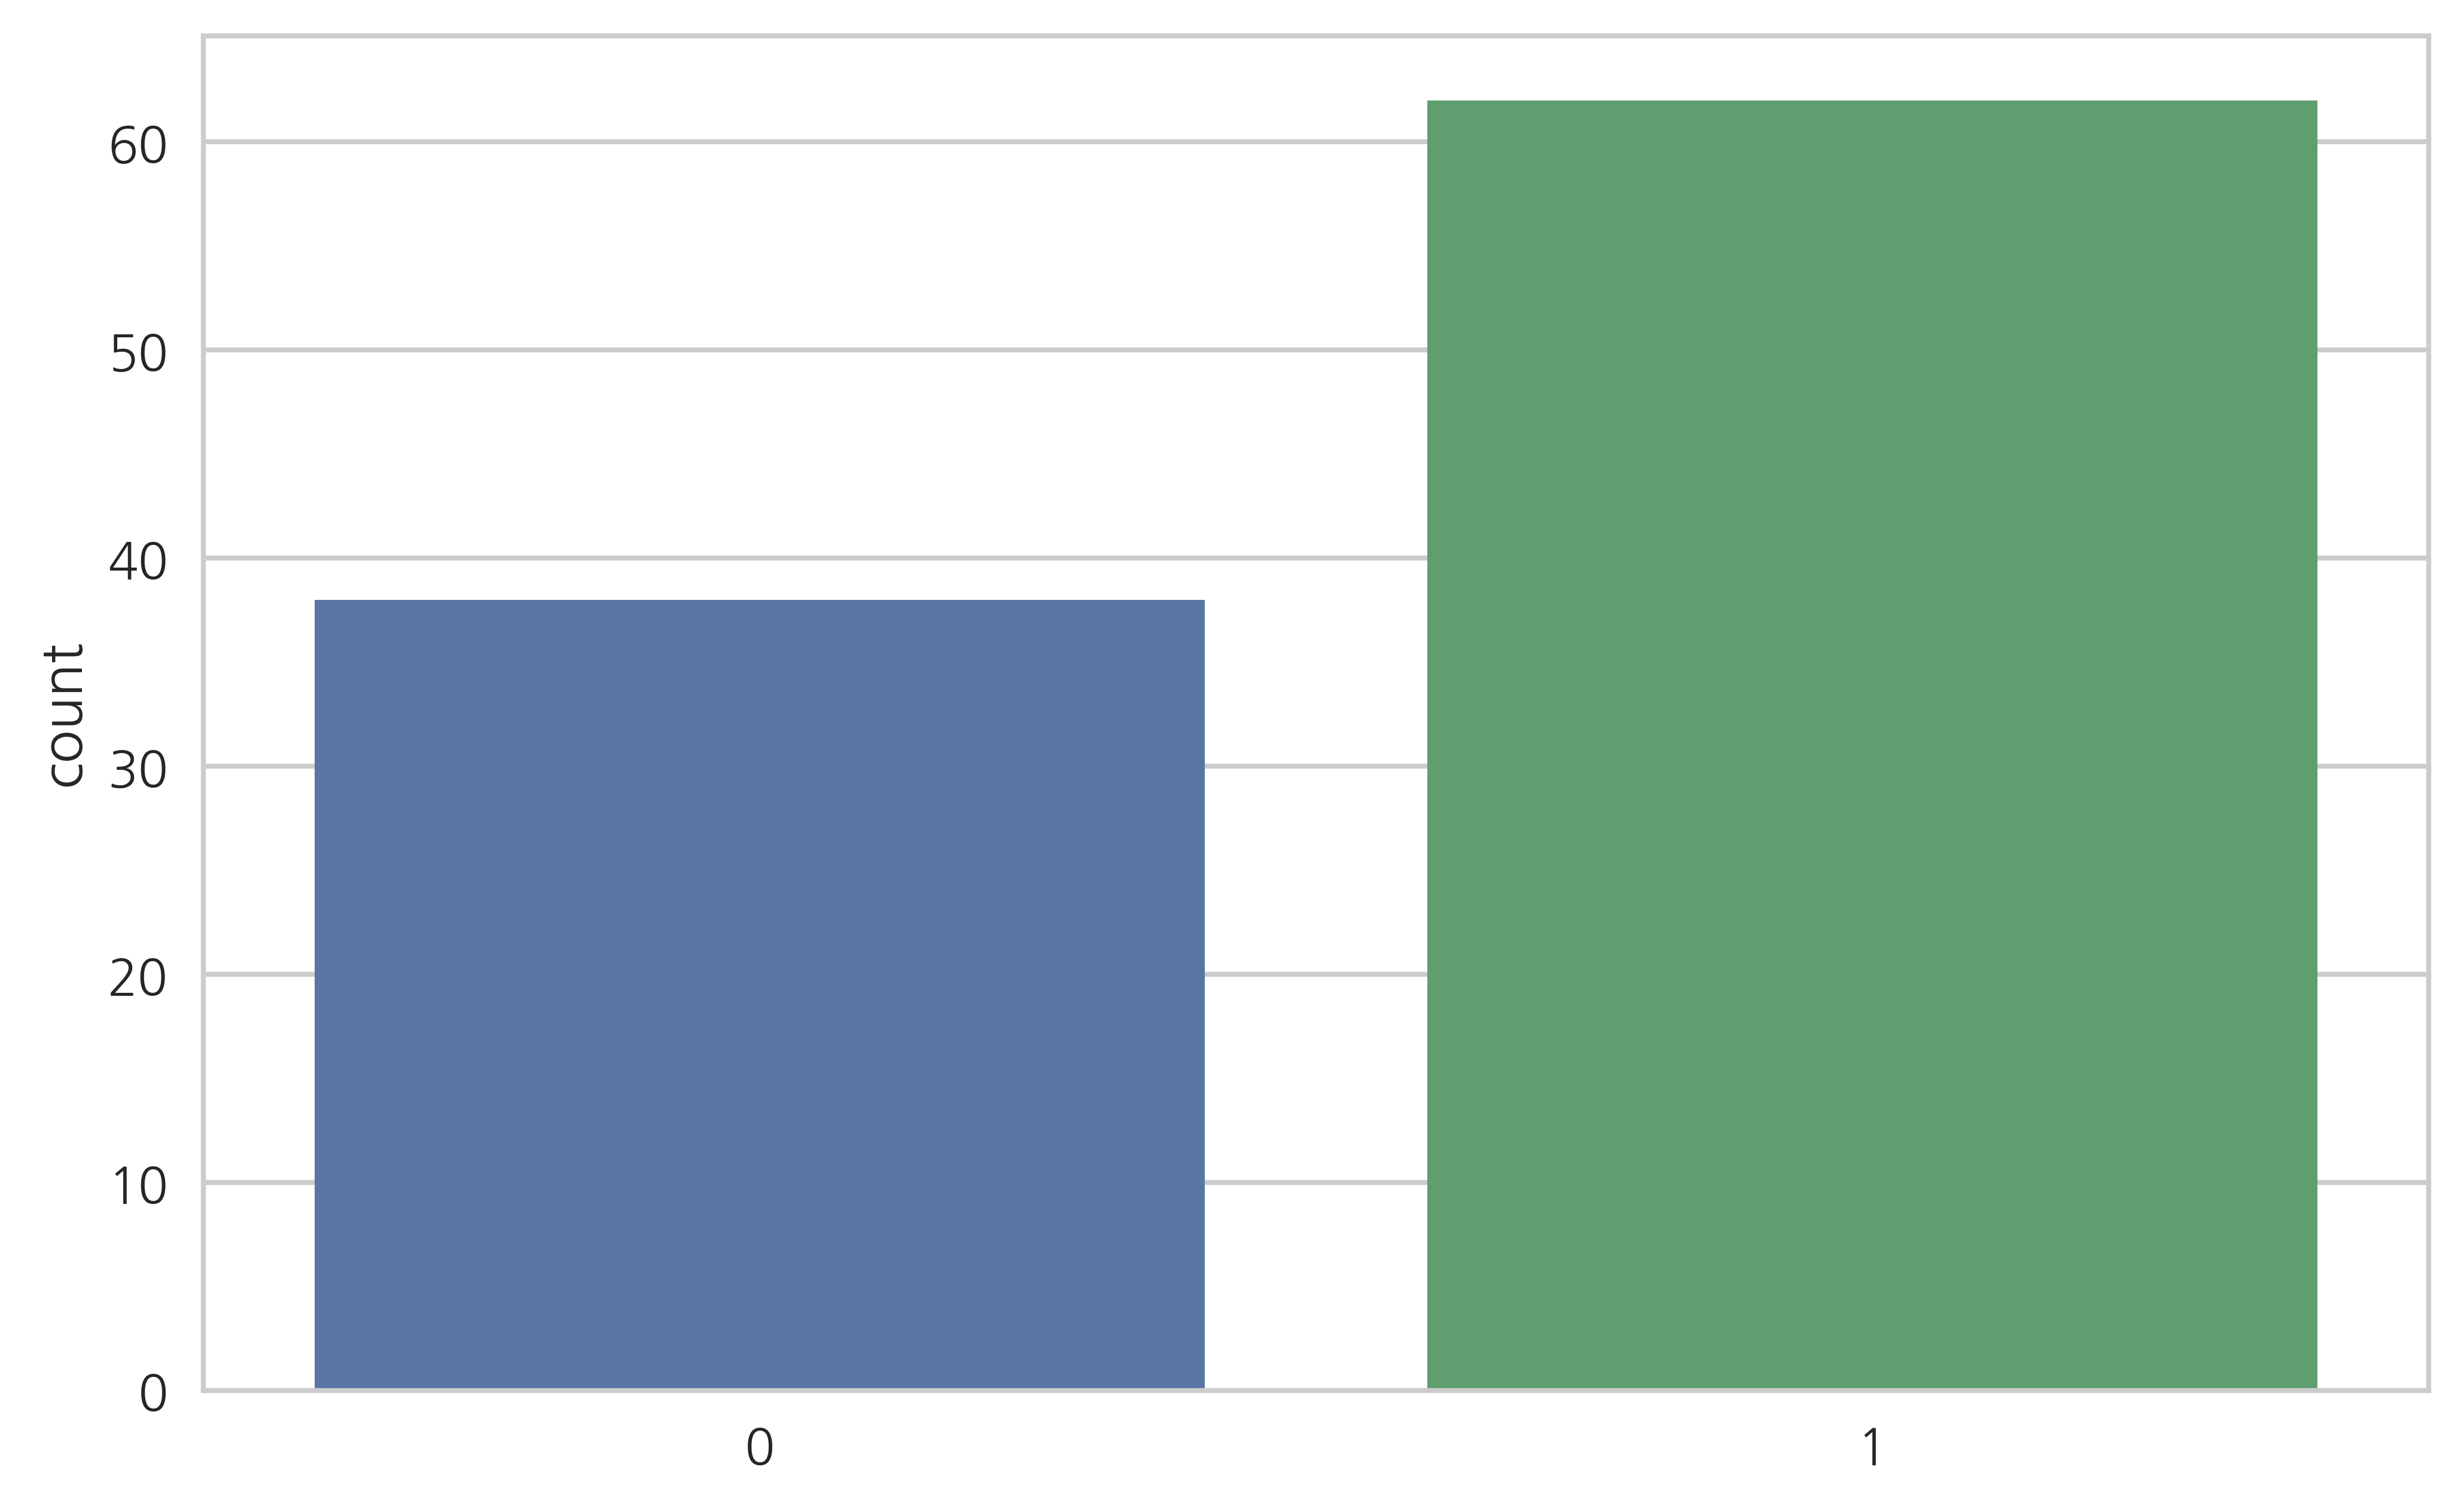

In [16]:
x = rv.rvs(100, random_state=0)
sns.countplot(x)
plt.show()

### Comparison

In [17]:
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({"theoretic": rv.pmf(xx), "simulation": y})
df.index = [0, 1]
df

,simulation,theoretic
0,0.38,0.4
1,0.62,0.6


In [18]:
df2 = df.stack().reset_index()
df2.columns = ["value", "type", "ratio"]
df2

,value,type,ratio
0,0,simulation,0.38
1,0,theoretic,0.40
2,1,simulation,0.62
3,1,theoretic,0.60


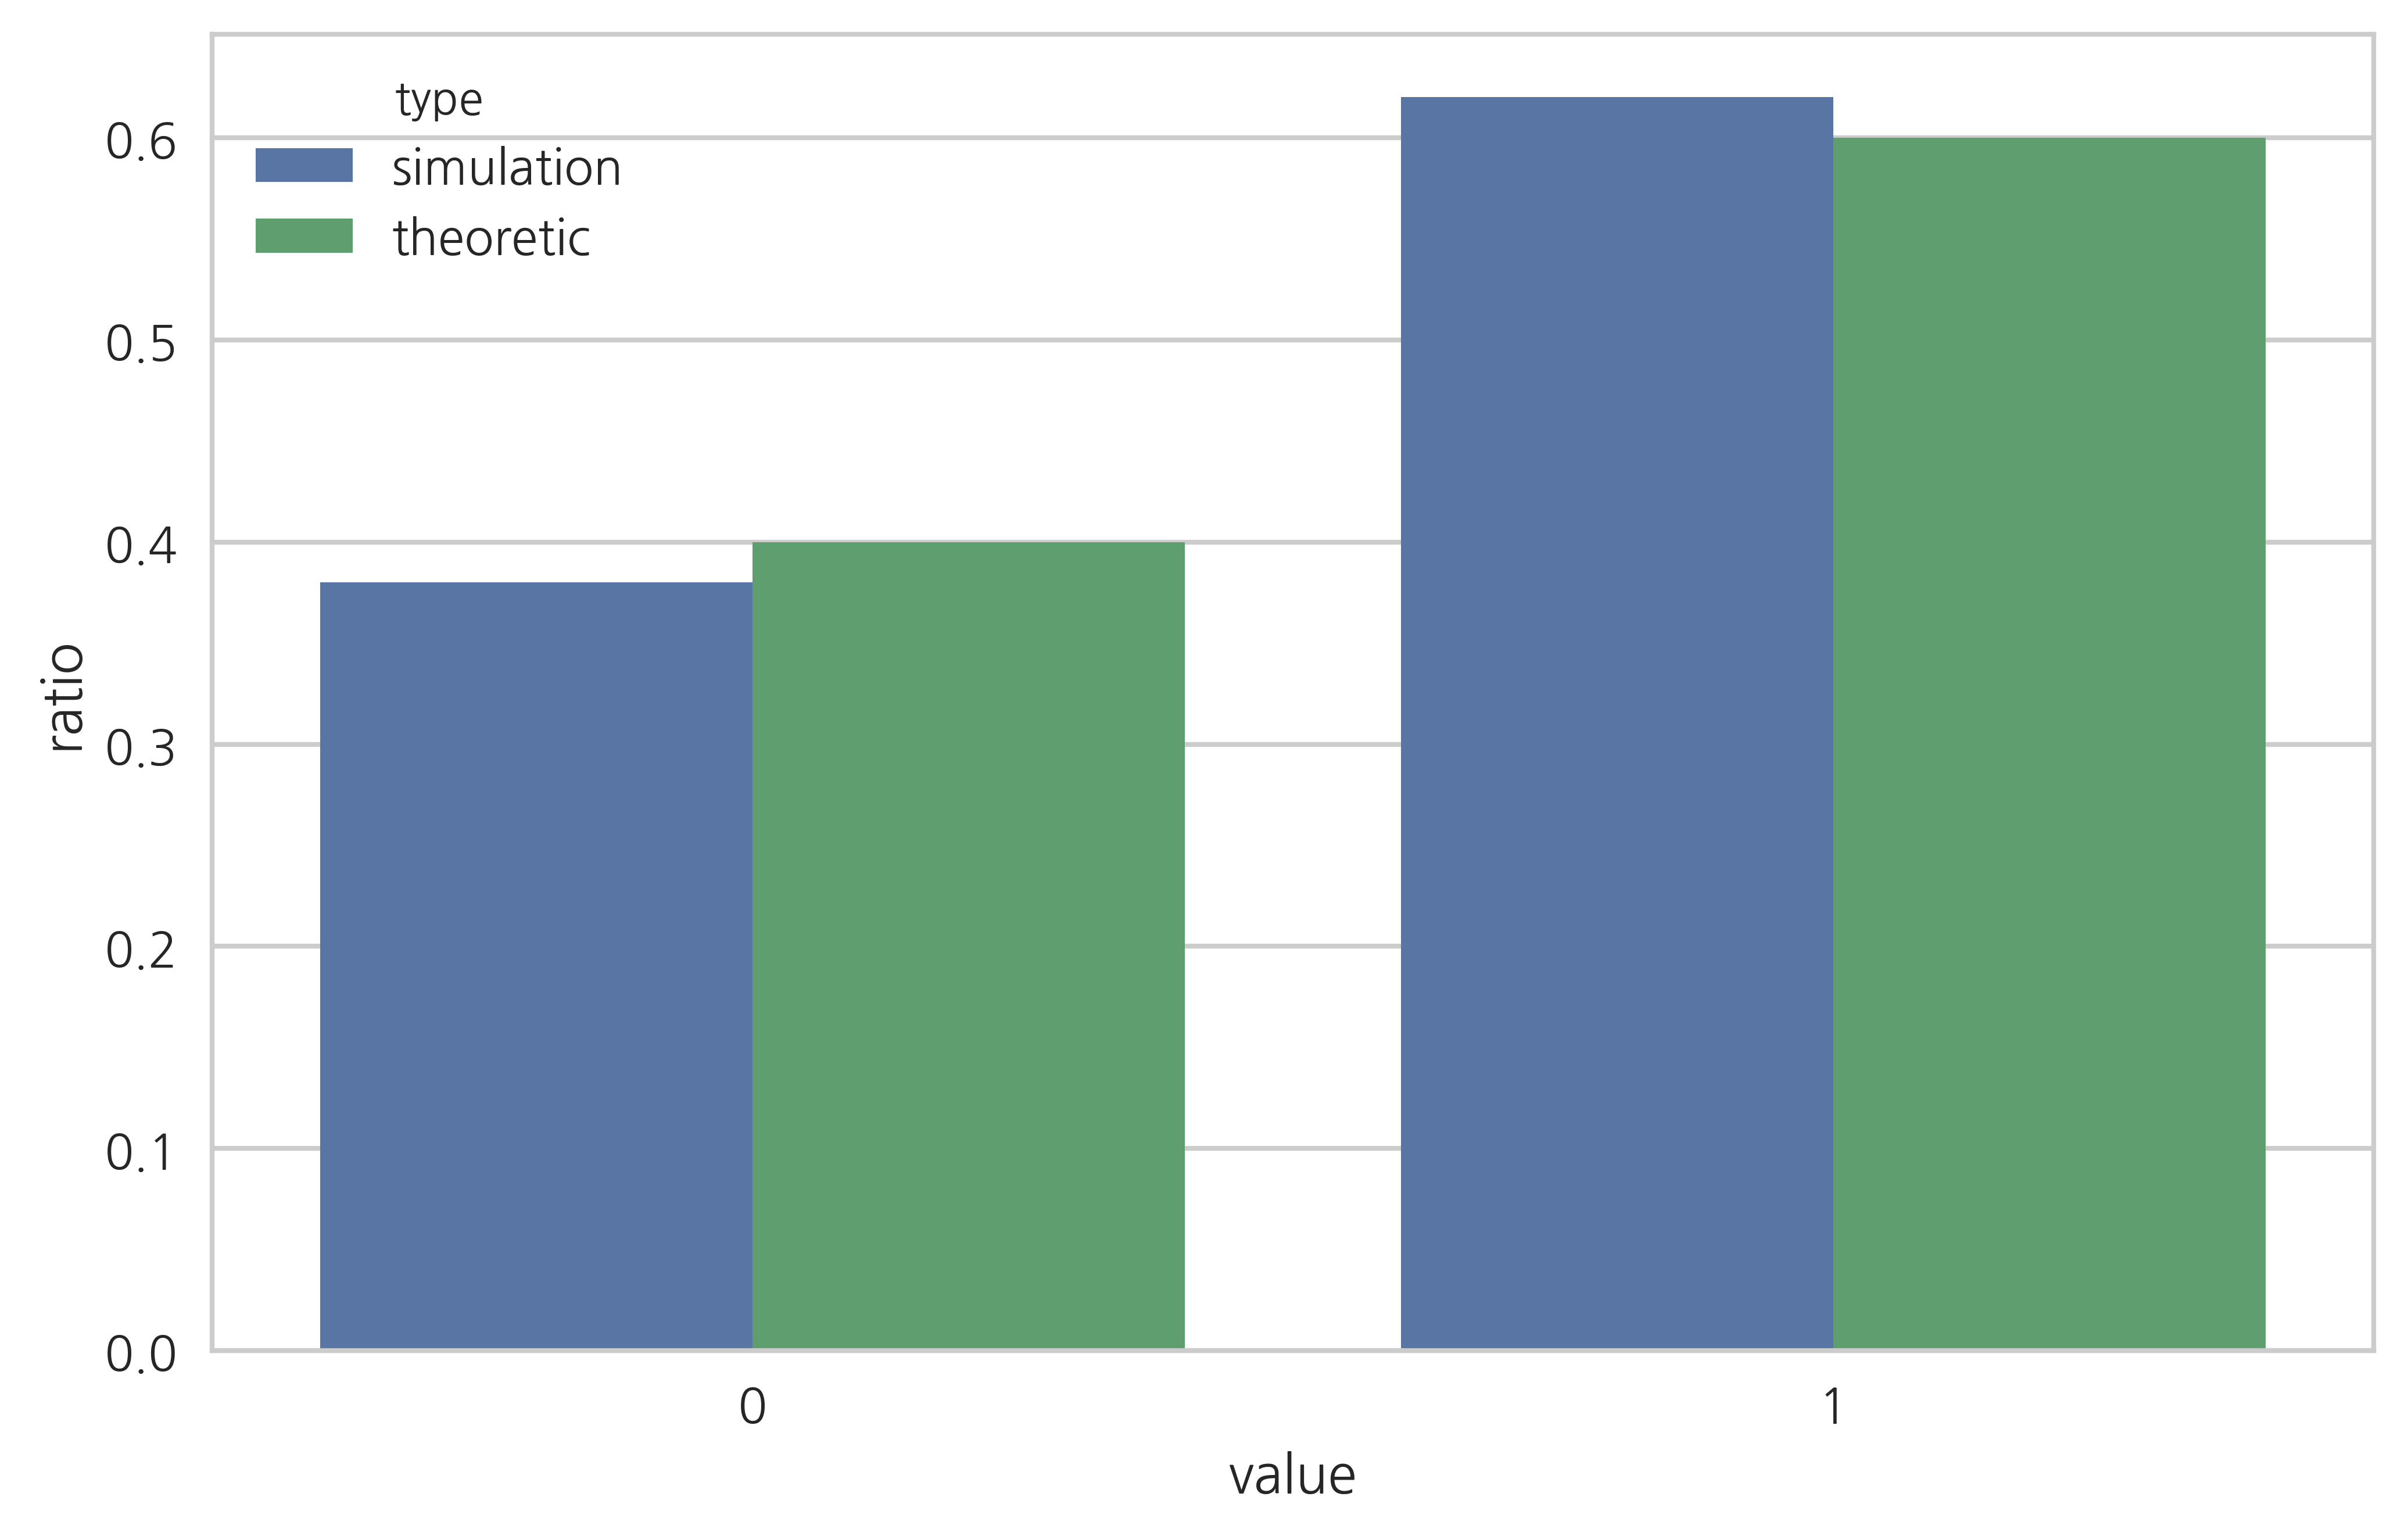

In [19]:
sns.barplot(x="value", y="ratio", hue="type", data=df2)
plt.show()

### Representative Values

In [21]:
#numpy
np.mean(x)
np.var(x, ddof=1) #ddof=1 : unbiased variance

#scipy
sp.stats.describe(x)

#pandas
pd.Series(x).describe()

count    100.000000
mean       0.620000
std        0.487832
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

># 5. Frequenctly-used Probability Distributions

### 1. Bernoulli
* Bernoulli trial - **success** or **fail** $\rightarrow$ **1** or **0**(or **-1**)
* Applicable to discrete random variable
$$$$
$$
\text{Bern}(x;\theta) = 
\begin{cases} 
\theta   & \text{if }x=1 \\
1-\theta & \text{if }x=0
\end{cases}
= \theta^x(1-\theta)^{(1-x)}
$$

#### 기댓값
* $\text{E}[X]  = \theta$
* $\text{E}[X] = \sum x_i P(x_i) = 1 \cdot \theta + 0 \cdot (1 - \theta) =  \theta$

#### 분산
* $\text{Var}[X] = \theta(1-\theta)$
* $\text{Var}[X] = \sum (x_i - \mu)^2 P(x_i) = (1 - \theta)^2 \cdot \theta + (0 - \theta)^2 \cdot (1 - \theta) = \theta(1-\theta)$

### 2. Binomial
* Bernoulli trial $\times$ $N$
* Applicable to discrete random variable
$$$$
$$ \text{Bin}(x;N,\theta) = \binom N x  \theta^x(1-\theta)^{N-x} = \dfrac{N!}{x!(N-x)!} \theta^x(1-\theta)^{N-x}$$
$$$$

#### 기댓값
* $ \text{E}[X] = N\theta $
* $ \text{E}[X] = \text{E} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{E}[ \text{Bern}_i ] = N\theta $

#### 분산
* $ \text{Var}[X] = N\theta(1-\theta)$
* $ \text{Var}[X] = \text{Var} \left[ \sum_{i=1}^N \text{Bern}_i \right] = \sum_{i=1}^N  \text{Var}[ \text{Bern}_i ] = N\theta(1-\theta)$

### 3. Gaussian Normal
* Often used in the natural and social sciences to represent real-valued random variables
* $\mu$ : mean / $\sigma^2$ : variance
* $\mu = 0, \sigma^2=1 \rightarrow$ standard normal distribution
$$$$
$$ \mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right) $$
$$$$

### Central Limit Theorem
$X_1, X_2, \ldots, X_n$: 기댓값이 $\mu$이고 분산이 $\sigma^2$으로 동일 & 서로 독립인 확률 변수 분포
$$$$
$$ S_n = X_1+\cdots+X_n $$ 
$$$$
$$ \dfrac{S_n - n\mu}{\sqrt{n}} \xrightarrow{d}\ N(0,\;\sigma^2) $$

### Q-Q Plot
* Used for normality test
* Method:
    1. 대상 샘플을 크기에 따라 정렬(sort)
    2. 각 샘플의 분위수(quantile number) 계산
    3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값 계산
    4. 대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 scatter-plot
    5. 비교를 위한 45도 직선

### Q-Q Plot - scipy

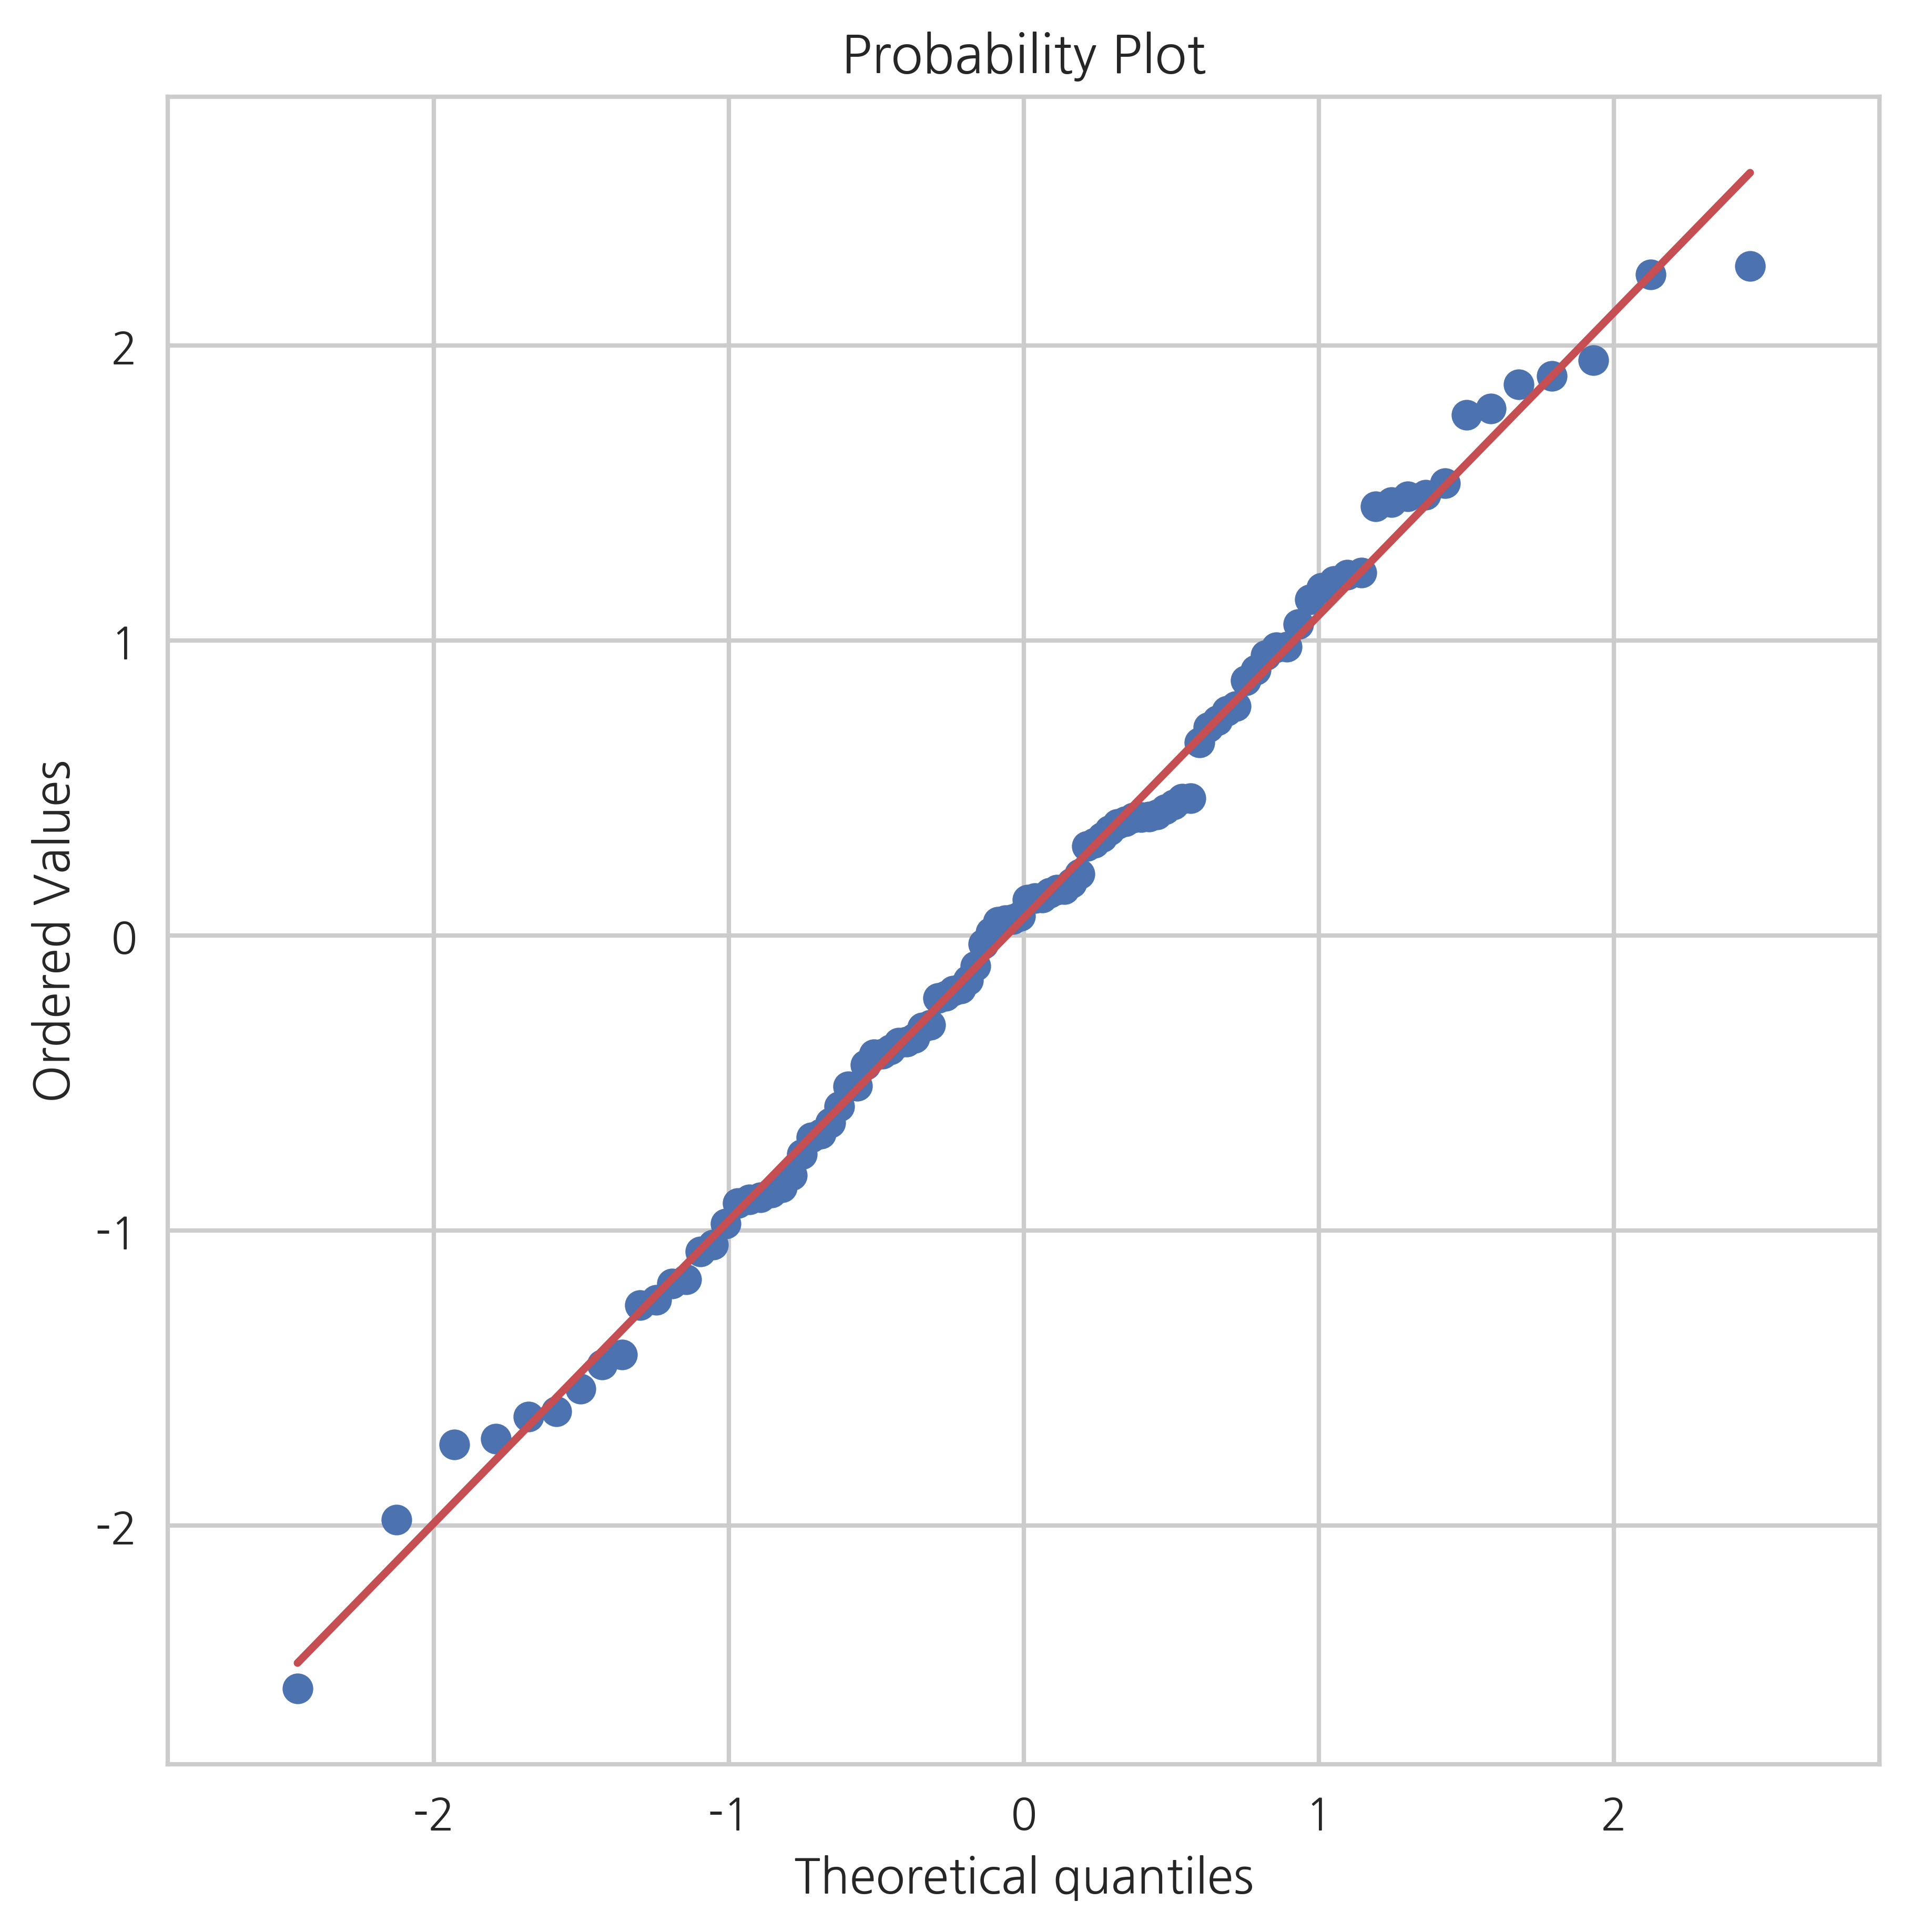

In [22]:
np.random.seed(0)
x = np.random.randn(100)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.show()

### 4. Student t
* Used to describe **Fat Tail** (정규분포에서 양 끝단의 비중이 더 큰 분포)
* $\nu$: degree of freedom, $[\nu \rightarrow \infty] \rightarrow [f \rightarrow \mathcal{N}]$
$$$$
$$ f(x; \mu, \sigma^2, \nu) = \frac{\Gamma(\frac{\nu+1}{2})} {\sqrt{\nu\pi}\,\Gamma(\frac{\nu}{2})} \left(1+\frac{(x-\mu)^2}{\nu\sigma^2} \right)^{\!-\frac{\nu+1}{2}} $$

#### 기댓값
* $\text{E}[X] = \mu$

#### 분산
* $[\nu = 1, 2] \rightarrow [\text{Var}[X] \rightarrow \infty]$
* $ \text{Var}[X] = \dfrac{\nu \sigma^2}{\nu-2} $

#### Student t 분포의 특징
* 가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$이 있을 때,
* **샘플 평균**을 **샘플 표준편차**로 나눈 값은 자유도가 $n-1$인 스튜던트 t 분포를 이룬다.

$$  \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}} \sim N \quad \text{&} \quad \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} \sim t(n - 1) $$

$\text{While,}$

$$ \bar{x} = \frac{x_1+\cdots+x_n}{n} \quad \text{&} \quad s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 $$


### 5. Chi Squared
* 가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$을 제곱 $\rightarrow \chi^2(x;\nu)$
$$$$
$$ f(x) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)} $$
$$$$
$$ \Gamma(a) = \int_0^\infty  x^{a-1} e^{-x}\, dx $$

### 6. F
* 카이 제곱 분포를 따르는 독립적인 두 개의 확률 변수 $\chi^2_1(n_1)$와 $\chi^2_2(n_2)$의 확률 변수 샘플로부터 생성
$$$$
$$\chi^2_1(n_1) \quad \text{&} \quad \chi^2_2(n_2) \quad \rightarrow \quad \dfrac{x_1 / n_1}{x_2/ n_2} \sim F(n_1, n_2)$$
$$$$
$$ f(x; n_1,n_2) = \dfrac{\sqrt{\dfrac{(n_1\,x)^{n_1}\,\,n_2^{n_2}} {(n_1\,x+n_2)^{n_1+n_2}}}} {x\,\text{Beta}\!\left(\frac{n_1}{2},\frac{n_2}{2}\right)}  $$
$$$$

### 7. Beta 
* Used for Bayesian estimation(추정하고자 하는 모수의 값을 분포로 묘사하는 것)
* Finite Support ($ 0 \leq x \leq 1 $)
$$$$
$$
\begin{align}
\text{Beta}(x;a,b) 
& = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\, x^{a-1}(1-x)^{b-1} 
\end{align}
$$

#### 기댓값
* $E[x] = \dfrac{a}{a+b}$

#### 최빈값
* $\dfrac{a - 1}{a+b - 2}$

#### 분산
* $\text{Var}[x] = \dfrac{ab}{(a+b)^2(a+b+1)}$

### 8. Dirichlet
* Beta distribution for multi-variable with the following constraint
* For K=2, Dirichlet = Beta
* $0 \leq x_i \leq 1 \quad \text{&} \quad \sum_{i=1}^{K} x_i = 1 $
* $\boldsymbol\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_K)$ (디리클레 분포의 모수 벡터)
$$$$
$$ f(x_1, x_2, \cdots, x_K) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{i=1}^K x_i^{\alpha_i - 1} $$
$$$$
$$ \mathrm{B}(\boldsymbol\alpha) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)} {\Gamma\bigl(\sum_{i=1}^K \alpha_i\bigr)} $$

#### 기댓값
* $E[x_k] = \dfrac{\alpha_k}{\alpha} \quad \text{where} \quad \alpha=\sum\alpha_k$

#### 최빈값
* $ \dfrac{\alpha_k - 1}{\alpha - K}$

#### 분산
* $\text{Var}[x_k] =\dfrac{\alpha_k(\alpha - \alpha_k)}{\alpha^2(\alpha + 1)}$

### 9. Gamma
* Used for Bayesian estimation(추정하고자 하는 모수의 값을 분포로 묘사하는 것)
* Infinite Support ($ 0 < x < \infty $)
$$$$
$$ \text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx} $$

#### 기댓값
* $ \text{E}[X] = \dfrac{a}{b}$

#### 최빈값
* $ \dfrac{a-1}{b}$

#### 분산
* $\text{Var}[X] = \dfrac{a}{b^2}$

### 10. Category
* One-Hot-Encoding: category values $\rightarrow$ vector with $1$ and $0$s
$$$$
$$ 
\text{Cat}(x;\theta) = 
\begin{cases}
\theta_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\theta_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\theta_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\theta_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
$$
$$$$
* Simplified form
$$$$
$$ \text{Cat}(x;\theta) = \theta_1^{x_1} \theta_2^{x_2}  \cdots \theta_K^{x_K}  =  \prod_{k=1}^K \theta_k^{x_k} $$

#### 기댓값
* $\text{E}[x_k] = \theta_k$

#### 분산
* $\text{Var}[x_k] = \theta_k(1-\theta_k)$

#### Category - scipy
```python
np.random.seed(0)
theta = np.array([1/6]*6)
X = np.random.multinomial(1, theta, size=20)
X
```

### 11. Multinomial
* Category distribution $\times N \quad \rightarrow \quad $ 각 원소의 성공횟수 값의 분포: Multinomial
$$$$
$$ \text{Mu}(x;N,\theta) = \binom N x  \prod_{k=1}^K \theta_k^{x_k} = \binom N {x_1, \cdots, x_K} \prod_{k=1}^K \theta_k^{x_k} $$
$$$$
$$ \binom N {x_1, \cdots, x_K} = \dfrac{N!}{x_1! \cdots x_K!} $$

#### 기댓값
* $\text{E}[x_k] = N\theta_k$

#### 분산
* $\text{Var}[x_k] = N\theta_k(1-\theta_k)$

#### Multinomial - scipy
``` python
np.random.seed(0)
N = 30
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4])
X = np.random.multinomial(N, theta, size=100)
X[:5]
```

># 부록

### 1. 독립인 두 확률 변수의 분산 - 증명
$$ 
\begin{eqnarray}
\text{Var}\left[ X + Y \right] 
&=& \text{E}\left[ (X + Y - (\mu_X + \mu_Y))^2 \right] \\
&=& \text{E}\left[ ((X -\mu_X) + (Y - \mu_Y))^2 \right] \\
&=& \text{E}\left[ (X -\mu_X)^2 + (Y - \mu_Y)^2 + 2(X-\mu_X)(Y-\mu_Y) \right] \\
&=& \text{E}\left[ (X -\mu_X)^2 \right] + \text{E}\left[ (Y - \mu_Y)^2 \right] + 2\text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] 
\end{eqnarray}
$$
$$ \text{E}\left[ (X-\mu_X)(Y-\mu_Y) \right] = 0 $$
$$$$
$$ \therefore \text{Var}\left[ X + Y \right] =  \text{E}\left[ (X -\mu_X)^2 \right] + \text{E}\left[ (Y - \mu_Y)^2 \right] =  \text{Var}\left[ X \right] + \text{Var}\left[ Y \right]$$

### 2. 샘플 평균의 분산 - 증명
$$ 
\begin{eqnarray}
\text{Var}[\bar{X}] 
&=& \text{Var} \left[ \dfrac{1}{N} \sum_{i=1}^N X_i \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \sum_{i=1}^N X_i - \mu \right)^2 \right] \\
&=& \text{E} \left[ \left( \dfrac{1}{N} \sum_{i=1}^N (X_i - \mu) \right)^2 \right] \\
&=& \text{E} \left[ \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N (X_i - \mu) (X_j - \mu)  \right] \\
&=& \text{E} \left[ \dfrac{1}{N^2} \sum_{i=1}^N (X_i - \mu)^2 \right] \\
&=& \text{E} \left[ \dfrac{1}{N} (X - \mu)^2 \right] \\
&=& \dfrac{1}{N} \text{Var}[X] = \dfrac{\sigma^2}{N}
\end{eqnarray}
$$ 

### 3. 샘플 분산의 기대값 - 증명
$$$$
$$ 
\begin{eqnarray}
\text{E}[s^2] 
&=& \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N (X_i - \bar{X})^2 \right] 
= \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N \left\{ (X_i -\mu) - (\bar{X} - \mu) \right \}^2  \right] \\
&=& \text{E} \left[ \dfrac{1}{N}\sum_{i=1}^N \left\{ (X_i -\mu)^2 - 2 (X_i -\mu)(\bar{X} - \mu) +  (\bar{X} - \mu)^2 \right \}  \right] \\
&=&  \text{E} \left[ \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)^2 \right] 
  - 2 \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)(\bar{X} - \mu) } \right] 
  +  \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (\bar{X} - \mu)^2 } \right] 
\end{eqnarray} 
$$
$$$$
$$ \text{E} \left[ \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)^2 \right] = \text{Var}[X] = \sigma^2 $$ 
$$$$
$$
\begin{eqnarray}
\text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu)(\bar{X} - \mu) } \right] 
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu) \left( \dfrac{1}{N} \sum_{j=1}^N X_j - \mu \right) } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (X_i -\mu) \left( \dfrac{1}{N} \sum_{j=1}^N ( X_j - \mu ) \right) } \right]  \\
&=& \text{E} \left[ { \dfrac{1}{N^2} \sum_{i=1}^N \sum_{j=1}^N (X_i -\mu)  ( X_j - \mu )} \right]  \\
&=& \dfrac{1}{N} \text{Var}[X] = \dfrac{\sigma^2}{N}
\end{eqnarray} 
$$
$$$$
$$
\text{E} \left[ { \dfrac{1}{N} \sum_{i=1}^N (\bar{X} - \mu)^2 } \right] = \dfrac{1}{N} \text{Var}[X] = \dfrac{\sigma^2}{N}
$$
$$$$
$$
\therefore \text{E}[s^2] = \sigma^2 - \dfrac{2\sigma^2}{N} + \dfrac{\sigma^2}{N} = \dfrac{N-1}{N}\sigma^2 
$$